<a href="https://colab.research.google.com/github/mohan22iitk/Wine-Quality-Prediction/blob/main/Wine_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import seaborn as sns
wine_quality = pd.read_csv('winequality-red.csv')
wine_quality.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<ipython-input-15-74f3c8056f9d>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wine_quality[col],hist_kws=dict(edgecolor="k", linewidth=1, color= 'blue'), color='red')
<ipython-input-15-74f3c8056f9d>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wine_quality[col],hist_kws=dict(edgecolor="

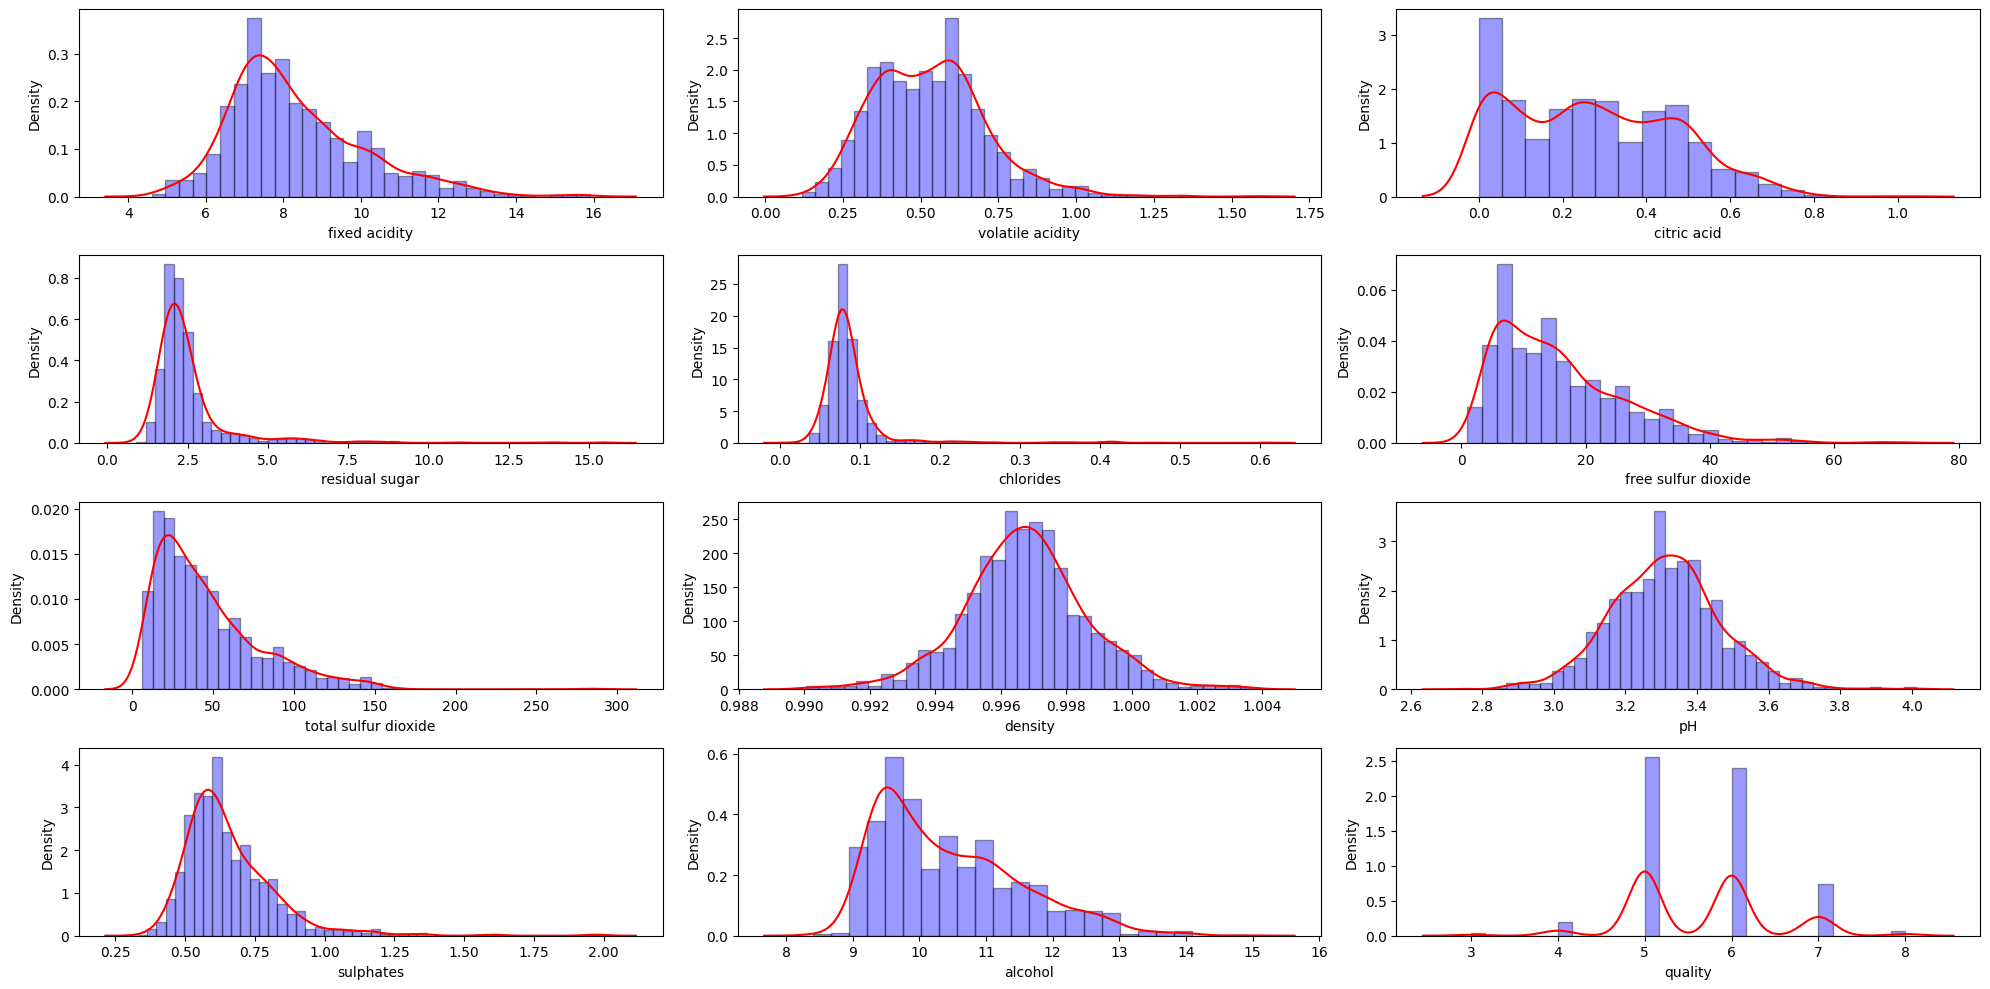

In [15]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize = [20,10])
cols = wine_quality. columns
cnt = 1

for col in cols:
  plt.subplot(4,3, cnt)
  sns.distplot(wine_quality[col],hist_kws=dict(edgecolor="k", linewidth=1, color= 'blue'), color='red')
  cnt+=1

plt. tight_layout ()
plt. show ()


<Axes: >

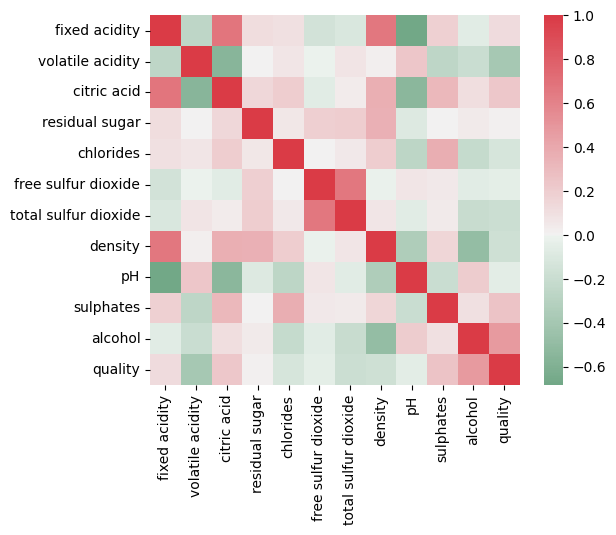

In [16]:
cmap = sns.diverging_palette(500, 10, as_cmap=True)
sns.heatmap(wine_quality.corr(), cmap=cmap, center = 0, square=True)

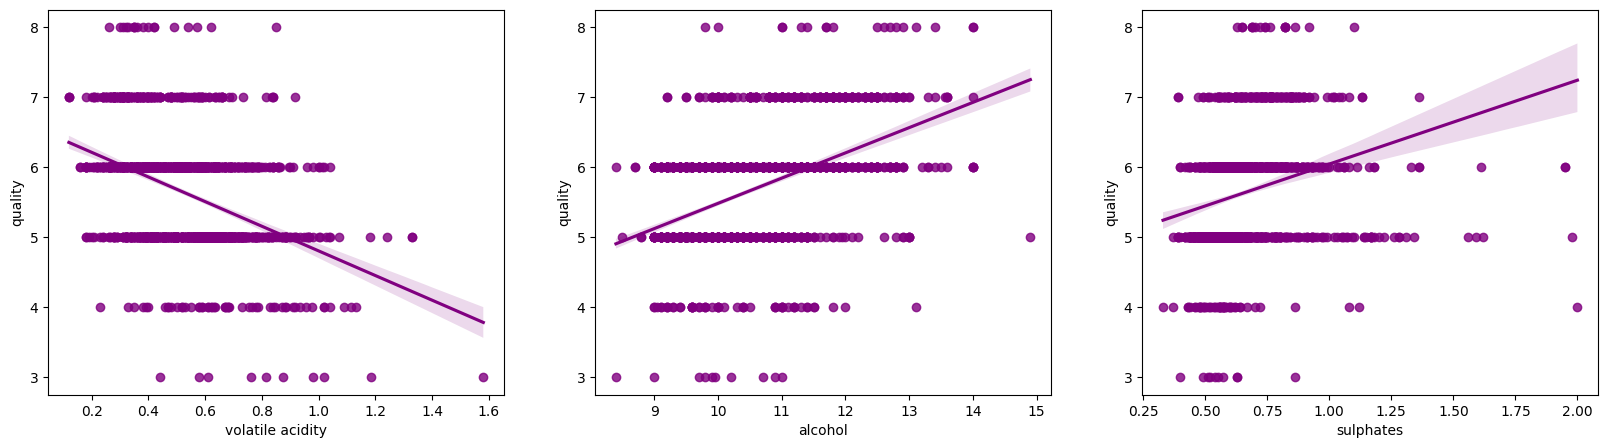

In [17]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
cols = ['volatile acidity', 'alcohol', 'sulphates']
for col, ax in zip(cols, axs.flat):
  sns.regplot(x = wine_quality [col], y = wine_quality["quality"], color = 'purple', ax=ax)

<ipython-input-18-a0bf5ac444a0>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="quality", y=cols[cnt], data=wine_quality, palette="coolwarm", ax=axes[i, j])
<ipython-input-18-a0bf5ac444a0>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="quality", y=cols[cnt], data=wine_quality, palette="coolwarm", ax=axes[i, j])
<ipython-input-18-a0bf5ac444a0>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="quality", y=cols[cnt], data=wine_quality, palette="coolwarm", ax=axes[i, j])
<ipython-input-18-a0bf5ac444a0>:10: FutureWarning: 

Passing 

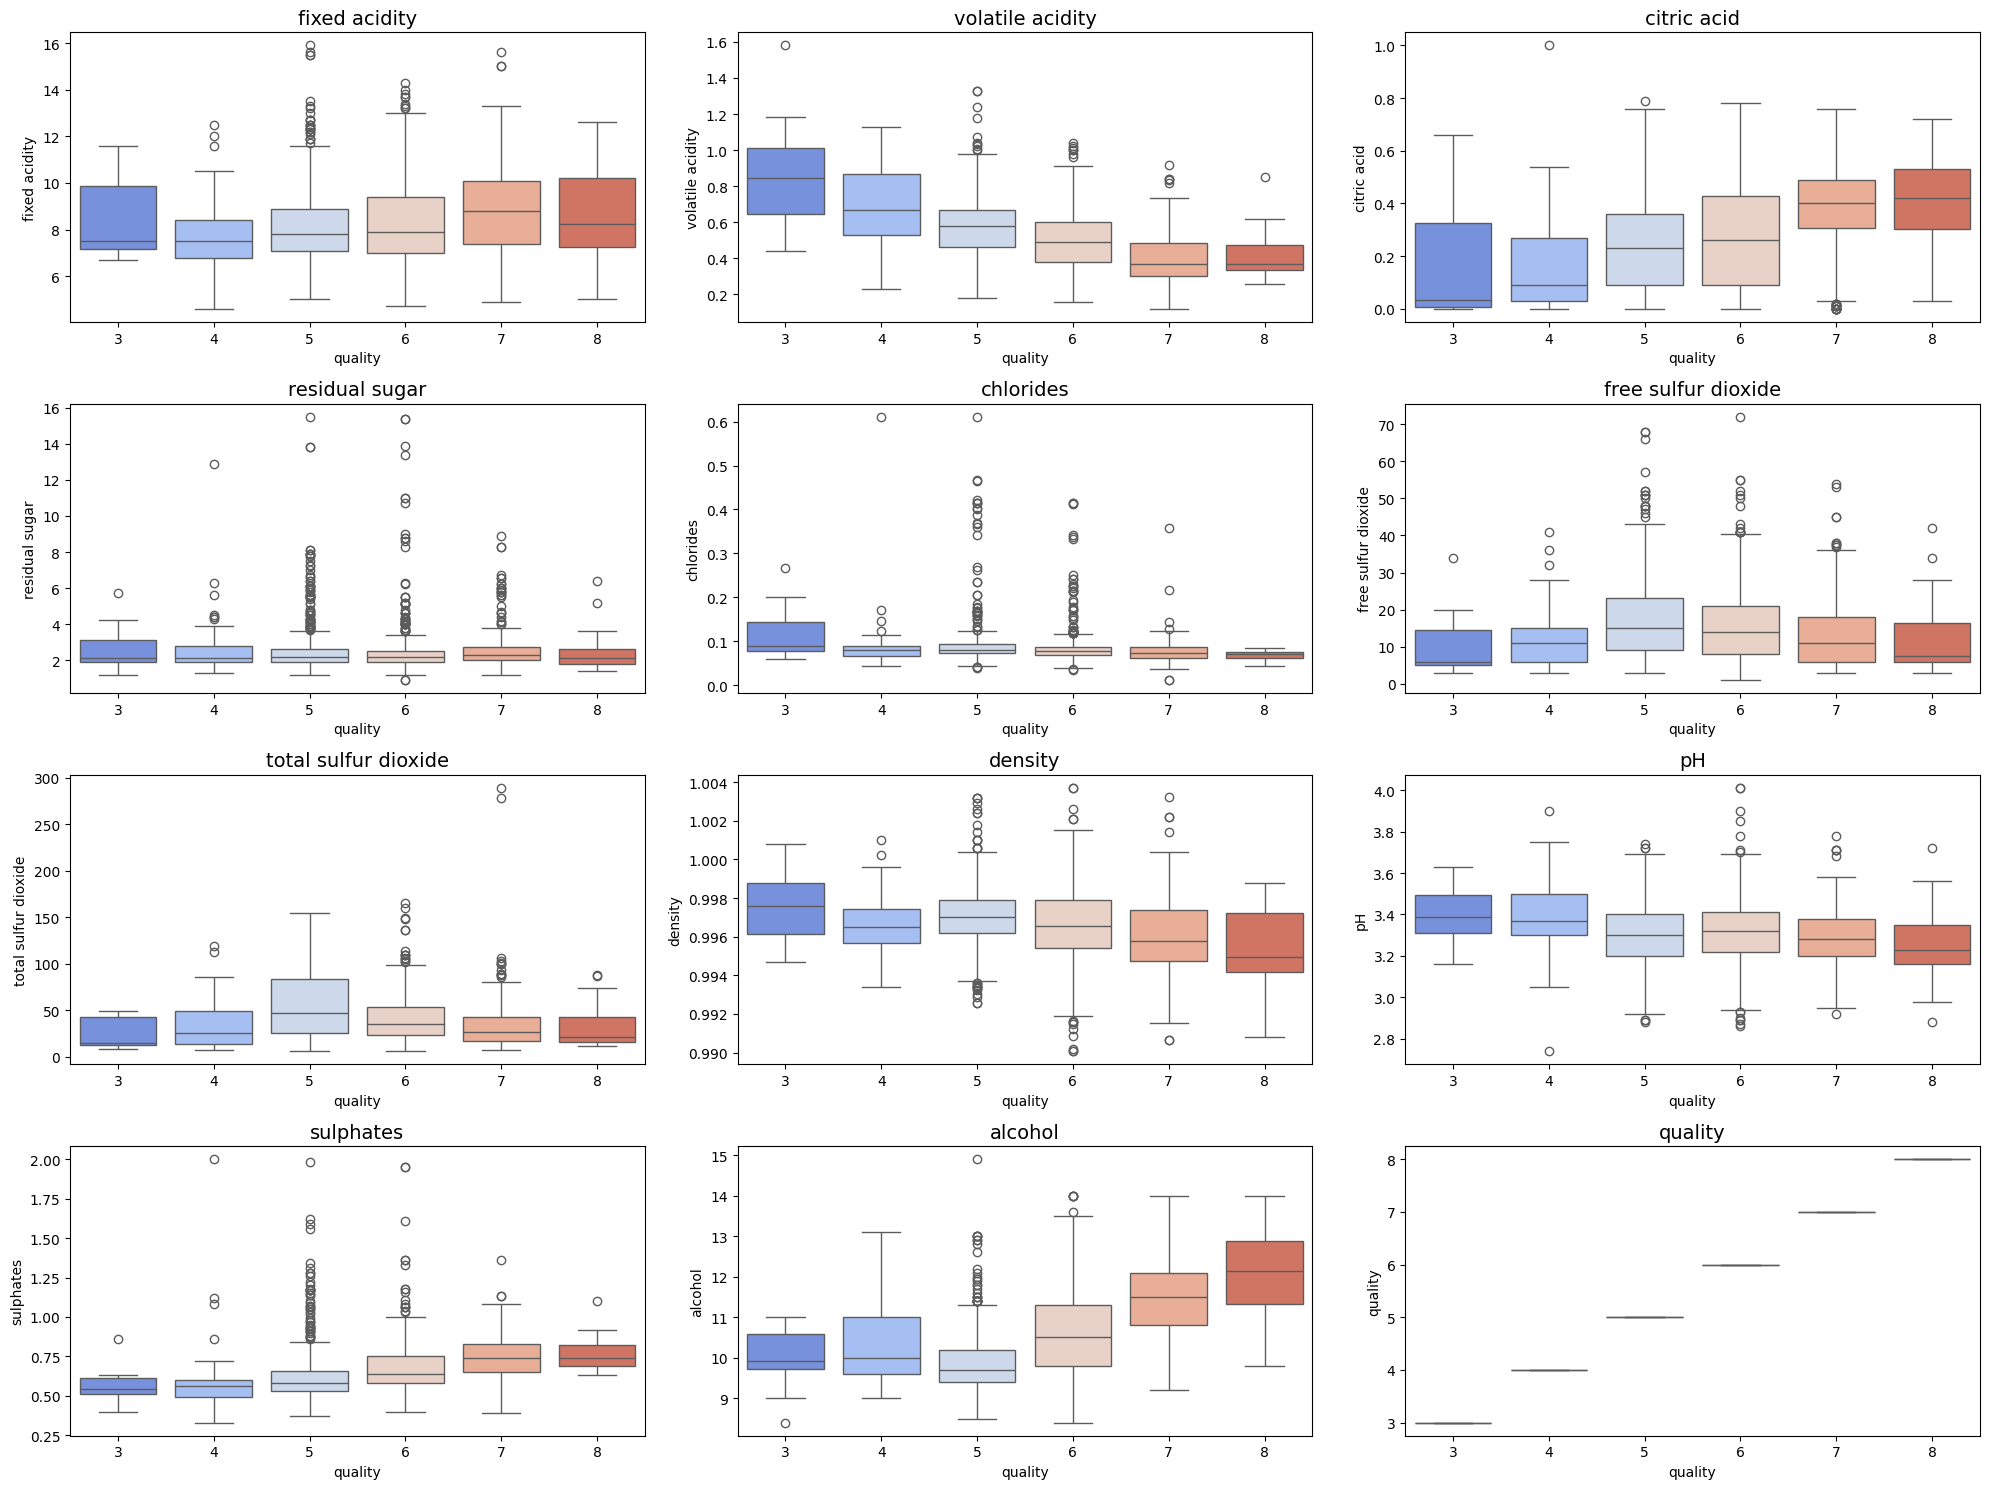

In [18]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 15))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

cols = wine_quality.columns
cnt = 0

for i in range(4):
    for j in range(3):
        if cnt < len(cols):
            sns.boxplot(x="quality", y=cols[cnt], data=wine_quality, palette="coolwarm", ax=axes[i, j])
            axes[i, j].set_title(cols[cnt], fontsize=14)
            cnt += 1

plt.tight_layout()
plt.show()


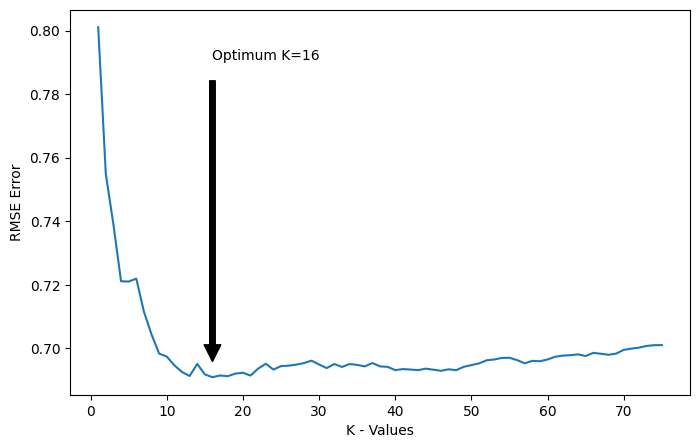

In [19]:
from sklearn import neighbors
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

target = wine_quality['quality']
features = wine_quality.drop('quality', axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.3)
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_test = scaler.transform(X_test)  # Change made here
X_test = pd.DataFrame(X_test)
rms_error = []
for K in range(1, 76):  # Change made here
    model = neighbors.KNeighborsRegressor(n_neighbors=K)
    model.fit(X_train, Y_train)
    pred = model.predict(X_test)
    error = mean_squared_error(Y_test, pred, squared=False)
    rms_error.append(error)  # Change made here

x = np.arange(1, 76)  # Change made here
y = rms_error
fig, ax = plt.subplots(figsize=[8, 5])  # Change made here
ax.plot(x, y)

# Function to annotate the optimum point
def annot_optimum(x, y):
    min_error = min(y)
    min_index = y.index(min_error)
    ax.annotate(f'Optimum K={min_index + 1}', xy=(x[min_index], min_error), xytext=(x[min_index], min_error + 0.1),
                arrowprops=dict(facecolor='black', shrink=0.05))

annot_optimum(x, y)

plt.xlabel('K - Values')
plt.ylabel('RMSE Error')
plt.show()
